In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [239]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
survived = train_df.Survived.copy()
df_list = [train_df,test_df]
#all_df = pd.concat([train_df,test_df],axis = 0)
#all_df.info()

In [240]:
sex_map = {'male':0,'female':1}
for df in df_list:
    df['Title'] = df['Name'].str.split(',',expand = True)[1].str.split('.',expand = True)[0].str.strip(' ')
    #df.Age.fillna(value = df.Age.mean(),inplace = True)
    df.Embarked.fillna(value = df.Embarked.mode()[0],inplace = True)
    df.Fare.fillna(value = df.Fare.mean(),inplace = True)
    df['FamilySize']= df['SibSp']+df['Parch']+1
    df.drop(['Cabin','Ticket'],axis = 1,inplace = True)
    df.Sex = df.Sex.map(sex_map).astype(int)
    

test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
FamilySize     418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object


In [241]:
train_df.iloc[np.max(train_df.Fare).astype(int)]

PassengerId                          513
Survived                               1
Pclass                                 1
Name           McGough, Mr. James Robert
Sex                                    0
Age                                   36
SibSp                                  0
Parch                                  0
Fare                             26.2875
Embarked                               S
Title                                 Mr
FamilySize                             1
Name: 512, dtype: object

In [242]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [243]:
title_age = train_df[['Title','Age']].groupby('Title').mean().astype(int)
print(title_age)

              Age
Title            
Capt           70
Col            58
Don            40
Dr             42
Jonkheer       38
Lady           48
Major          48
Master          4
Miss           21
Mlle           24
Mme            24
Mr             32
Mrs            35
Ms             28
Rev            43
Sir            49
the Countess   33


In [244]:
train_df[['Title','Fare']].groupby('Title').mean()

,Fare
Title,
Capt,71.000000
Col,31.025000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125
Miss,43.797873


In [245]:
print(test_df.groupby('Title').size())
print(train_df.groupby('Title').size())

Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64
Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64


In [246]:
for df in df_list:
    df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Misc',regex=True)
    df['Title'] = df['Title'].replace('Mlle','Miss',regex=True)
    df['Title'] = df['Title'].replace('Mme','Mrs',regex=True)
    df['Title'] = df['Title'].replace('Ms','Miss',regex=True)
test_df.loc[(test_df['Title']=='Misca'),'Title'] = 'Misc'
test_df.iloc[414]

PassengerId                            1306
Pclass                                    1
Name           Oliva y Ocana, Dona. Fermina
Sex                                       1
Age                                      39
SibSp                                     0
Parch                                     0
Fare                                  108.9
Embarked                                  C
Title                                  Misc
FamilySize                                1
Name: 414, dtype: object

In [247]:
train_df[['Title','Age']].groupby('Title').mean().astype(int)

,Age
Title,
Master,4
Misc,45
Miss,21
Mr,32
Mrs,35


In [248]:
for df in df_list:
    df.loc[(df['Title'] == 'Master') & (df['Age'].isnull()),'Age'] = 4
    df.loc[(df['Title'] == 'Misc') & (df['Age'].isnull()),'Age'] = 45
    df.loc[(df['Title'] == 'Miss') & (df['Age'].isnull()),'Age'] = 21
    df.loc[(df['Title'] == 'Mr') & (df['Age'].isnull()),'Age'] = 32
    df.loc[(df['Title'] == 'Mrs') & (df['Age'].isnull()),'Age']=35

In [249]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object


In [250]:
train_df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


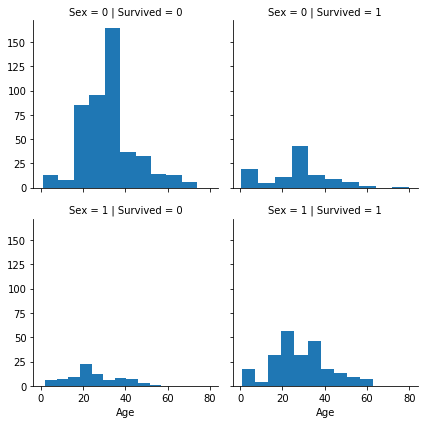

In [251]:
g = sns.FacetGrid(train_df,col='Survived',row = 'Sex')
g.map(plt.hist,'Age')

In [252]:
pd.pivot_table(data = train_df,columns = 'Sex',values = 'Survived',index = ['Pclass','Embarked'])
train_df[['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [253]:
train_df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [254]:
train_df[['FamilySize',"Survived"]].groupby('FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [255]:
## Classify family size into different sizes {alone:1,small:(2-4),medium(5-6),large(>6)}
def familyGroup(df):
    bins = [0,1,4,6,15]
    groupNames = [1,2,3,4] #alone,small,medium,large
    cat = pd.cut(df.FamilySize,bins,labels = groupNames)
    df.FamilySize = cat
    return df

for df in df_list:
    df = familyGroup(df)
train_df[['FamilySize','Survived']].groupby('FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.578767
3,0.162162
4,0.160000


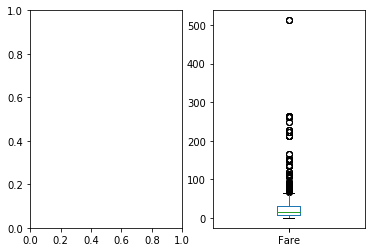

In [256]:
fig,ax = plt.subplots(1,2)
ax[0]= train_df.Fare.plot.box()
ax[1] =test_df.Fare.plot.box()

In [257]:
def fareGroup(df):
    groupName = [1,2,3,4]
    cat = pd.cut(df.Fare,4,labels = groupName)
    df.Fare = cat
    return df


      Survived
Fare          
1     0.368113
2     0.724138
3     0.666667
4     1.000000


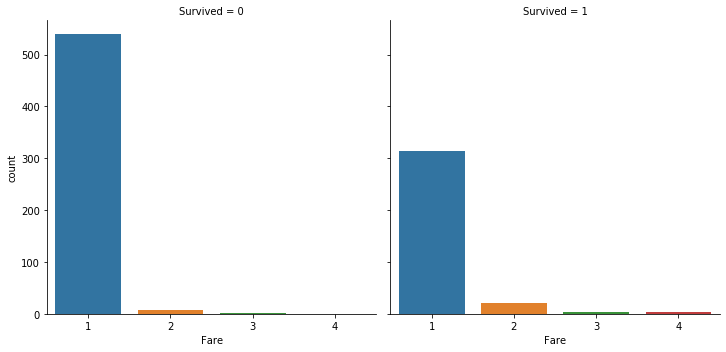

In [258]:
for df in df_list:
    df = fareGroup(df)
print(train_df[['Fare','Survived']].groupby('Fare').mean())
sns.catplot(data = train_df,x = 'Fare',col = 'Survived',kind = 'count')

In [259]:
train_df[['Fare','Survived']].groupby('Fare').size()

Fare
1    853
2     29
3      6
4      3
dtype: int64

In [260]:
train_df.Age.describe()
test_df.Age.describe()

count    418.000000
mean      30.037081
std       13.047360
min        0.170000
25%       21.250000
50%       30.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [261]:
def ageGroup(df):
    bins = [0,10,20,30,40,100]
    group = [0,1,2,3,4] #child,youth,young-adult,adult,senior
    cat = pd.cut(df.Age,bins,labels=group)
    df.Age = cat
    return df
for df in df_list:
    df = ageGroup(df)
train_df[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
0,0.588235
1,0.382609
2,0.398496
3,0.333333
4,0.364238


In [262]:
title_code = {'Mr':1,'Misc':2,'Master':3,'Miss':4,'Mrs':5}
embarked_code = {'S':1,'Q':2,'C':3}
pclass_code = {3:1,2:2,1:3}
family_code = {4:1,3:2,1:3,2:4}
age_code = {2:1,4:2,1:3,3:4,0:5}
fare_code = {1:1,2:3,3:2,4:4}
for df in df_list:
    df.Title = df.Title.map(title_code).astype(int)
    df.Pclass = df.Pclass.map(pclass_code)
    df.Embarked = df.Embarked.map(embarked_code)
    df.FamilySize = df.FamilySize.map(family_code)
    df.Age = df.Age.map(age_code)
    df.Fare = df.Fare.map(fare_code)
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,1,"Braund, Mr. Owen Harris",0,1,1,0,1,1,1,4
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,1,3,5,4
2,3,1,1,"Heikkinen, Miss. Laina",1,1,0,0,1,1,4,3
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,1,1,5,4
4,5,0,1,"Allen, Mr. William Henry",0,4,0,0,1,1,1,3


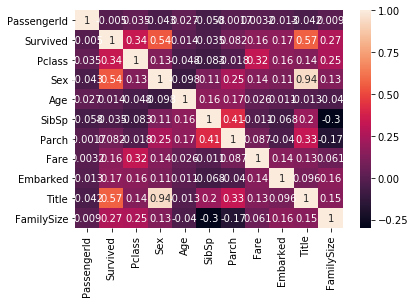

In [263]:
sns.heatmap(data = train_df.corr(),annot = True)

In [264]:
for df in df_list:
    df = df.drop(['Parch','SibSp'],axis = 1)
input_features = ['Pclass','Sex','Age','Fare','Embarked','Title','FamilySize']

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [266]:
train_input = train_df[input_features]
test_input = test_df[input_features]
X_train,X_test,y_train,y_test = train_test_split(train_input,survived)

In [267]:
clf  = RandomForestClassifier(random_state = 2019)
param = {'n_estimators':[4,6,9],
         'max_features':['log2','sqrt','auto'],
         'criterion':['entropy','gini'],
        'max_depth':[2,3,5,10],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8]
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X_train,y_train)

clf = grid.best_estimator_
print(clf)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(cross_val_score(clf,train_input,survived,cv = 5))
test_df['Survived'] = clf.predict(test_input)
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/random_forest.csv',index = False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)
0.7757847533632287
[0.8547486  0.82681564 0.8258427  0.79775281 0.84745763]


In [268]:
clf = AdaBoostClassifier(random_state = 2019)
param = {'n_estimators':[50,100,150,200,250],
        'learning_rate':[0.01,0.1,1],
        'algorithm':['SAMME','SAMME.R']
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X_train,y_train)

clf = grid.best_estimator_
print(clf)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(cross_val_score(clf,train_input,survived,cv = 5))
test_df['Survived'] = clf.predict(test_input)
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/adaboost.csv',index = False)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=250, random_state=2019)
0.7757847533632287
[0.83240223 0.82122905 0.82022472 0.80337079 0.85875706]


In [269]:
clf = GradientBoostingClassifier(random_state = 2019)
param = {'n_estimators':[50,100,150],
        'min_samples_split':[2,3,4],
        'max_depth':[3,4,5],
        'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[1,5,8]}
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X_train,y_train)

clf = grid.best_estimator_
print(clf)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(cross_val_score(clf,train_input,survived,cv = 5))
test_df['Survived'] = clf.predict(test_input)
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/gdbt.csv',index = False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=2019, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7847533632286996
[0.81005587 0.83240223 0.8258427  0.79775281 0.85875706]


In [270]:
clf = DecisionTreeClassifier(random_state = 2019)
param = {'criterion':['gini','entropy'],
        'max_depth':[3,6,9],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8],
        'max_features':['auto','sqrt','log2']
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X_train,y_train)
clf = grid.best_estimator_
print(clf)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(cross_val_score(clf,train_input,survived,cv = 5))
test_df['Survived'] = clf.predict(test_input)
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/decision_tree.csv',index = False)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')
0.7623318385650224
[0.83798883 0.82122905 0.82022472 0.80337079 0.83615819]


In [271]:
clf = XGBClassifier()
param = {'eta':[0.1,0.3,0.5,1],
        'gamma':[0,3,6],
        'max_depth':[3,6,9,10,12],
        'subsample':[0.5,1]}
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X_train,y_train)
clf = grid.best_estimator_
print(clf)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(cross_val_score(clf,train_input,survived,cv = 5))
test_df['Survived'] = clf.predict(test_input)
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/xgb.csv',index = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.7757847533632287
[0.83240223 0.82681564 0.8258427  0.79213483 0.8700565 ]


In [272]:
test_df[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
1,0.000000
2,0.166667
3,0.666667
4,0.962025
5,0.972222


In [276]:
test_df.loc[test_df['Title'] == 3,'Survived'] = 1

In [277]:
output = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
output.to_csv('titanic/guess.csv',index = False)

In [278]:
test_df[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
1,0.000000
2,0.166667
3,1.000000
4,0.962025
5,0.972222
